## 链家数据分析
我们来根据我们之前爬取的链家网数据，做一点小小的数据分析。

### 0.载入数据

In [1]:
import pandas as pd
lj_data = pd.read_csv('./LJdata.csv')

大家规范一点，用英文的column name，这样免去了后续的一些问题(主要是编码问题)

In [2]:
lj_data.columns

Index(['区域', '地址', '标题', '户型', '面积', '价格', '楼层', '建造时间', '朝向', '更新时间', '看房人数',
       '备注', '链接地址'],
      dtype='object')

In [3]:
lj_data.columns = ['district', 'address', 'title', 'house_type', 'area', 'price', 'floor', 'build_time', 'direction', 'update_time', 'view_num', 'extra_info', 'link']

Perfect, 然后咱们就可以开始做点分析了

### 查看数据的形状和信息
hint:都还记得info/describe/shape的用法吧，用起来！

In [10]:
lj_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 13 columns):
district       2760 non-null object
address        2760 non-null object
title          2760 non-null object
house_type     2760 non-null object
area           2760 non-null object
price          2760 non-null int64
floor          2760 non-null object
build_time     2758 non-null object
direction      2760 non-null object
update_time    2760 non-null object
view_num       2760 non-null int64
extra_info     2760 non-null object
link           2760 non-null object
dtypes: int64(2), object(11)
memory usage: 280.4+ KB


In [7]:
lj_data.shape

(2760, 13)

In [13]:
lj_data.describe(include='all')

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
count,2760,2760,2760,2760,2760,2760.000000,2760,2758,2760,2760,2760.000000,2760,2760
unique,208,1473,2369,24,203,NaN,105,138,35,14,NaN,1343,2381
top,望京租房,远洋山水,禾乔丽致公寓 诚意出租 看房随时 有钥匙,2室1厅,57平米,NaN,高楼层(共6层),2004年建塔楼,南 北,2017.07.26,NaN,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101660289.html
freq,109,19,4,1284,63,NaN,323,78,1009,634,NaN,469,3
mean,NaN,NaN,NaN,NaN,NaN,7570.800725,NaN,NaN,NaN,NaN,13.448913,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6316.204986,NaN,NaN,NaN,NaN,12.746202,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1300.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,4500.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,6000.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,8500.000000,NaN,NaN,NaN,NaN,19.000000,NaN,NaN


In [14]:
lj_data.head(2)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html


### 找到最近更新信息的20套房子

In [15]:
lj_data.sort_values(by='update_time').tail(20)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
467,万柳租房,康桥水郡,昆玉河畔观景大宅 复式4居20平露台有车位 明厨明卫,4室1厅,199平米,25000,高楼层(共16层),2004年建板楼,东 西,2017.07.27,7,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101744630.html
2358,新华大街租房,怡佳家园,怡佳家园 5室2厅 15000元,5室2厅,240平米,15000,高楼层(共28层),2002年建塔楼,东 南 北,2017.07.27,6,距离八通线通州北苑站1062米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101704899.html
2356,亚运村租房,安慧里四区,安慧里简装朝东南一居室，家具家电齐全，可拎包入住,1室1厅,43平米,4500,高楼层(共6层),1989年建板楼,东南,2017.07.27,19,距离5号线惠新西街北口站441米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101174347.html
475,金宝街租房,禾风相府,禾风相府 舒适三居 拎包入住 交通便利,3室1厅,163平米,32000,高楼层(共14层),2004年建板塔结合,南 北,2017.07.27,13,距离5号线东四站619米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101767933.html
2334,苏州桥租房,中湾国际,中湾国际 1室0厅 6500元,1室0厅,37平米,6500,中楼层(共19层),2007年建塔楼,北,2017.07.27,2,距离10号线苏州街站791米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101849862.html
2335,玉泉营租房,鸿业兴园一区,鸿业兴园 正规两居室 家电家具全齐,2室1厅,91平米,5500,中楼层(共16层),2006年建板塔结合,南,2017.07.27,4,随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101831875.html
1153,滨河西区租房,双峪路小区,双峪路小区有一精装修两室一厅出租,2室1厅,48平米,3100,中楼层(共5层),1981年建板楼,南,2017.07.27,12,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101790165.html
1829,北七家租房,西湖新村,水系社区 带花园的2居室 北边无遮挡采光充裕 居住舒适,2室2厅,94平米,3400,低楼层(共7层),2000年建板楼,南 北,2017.07.27,12,随时看房 集中供暖,https://bj.lianjia.com/zufang/101101630022.html
1158,通州北苑租房,长城国际,长城国际 精装一居 电梯房 拎包入住,1室1厅,53平米,3300,中楼层(共22层),2010年建塔楼,东,2017.07.27,18,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101791183.html
487,陶然亭租房,四平园,四平园 1室1厅 4600,1室1厅,53平米,4600,中楼层(共6层),1996年建板楼,东,2017.07.27,14,距离4号线陶然亭站719米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101779348.html


In [16]:
lj_data.loc[lj_data['update_time']=='2017.07.27',:].shape

(437, 13)

### 平均看房人数

In [17]:
lj_data['view_num'].median()

10.0

### 房龄最小的20套房子的平均看房人数、平均面积...

In [18]:
lj_data.head(2)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html


In [19]:
import numpy as np

In [20]:
def get_age(x):
    try:
        return 2018-int(x[:4])
    except:
        return np.NaN

In [21]:
def get_area(x):
    try:
        return int(x[:-2])
    except:
        return np.NaN

In [22]:
lj_data.loc[:,'age'] = lj_data['build_time'].apply(get_age)

In [23]:
lj_data.loc[:,'house_area'] = lj_data['area'].apply(get_area)

In [24]:
lj_data.head(2)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,age,house_area
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37.0,50
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,13.0,79


In [25]:
lj_data.nsmallest(columns='age', n=20)[['view_num', 'house_area']].mean()

view_num       11.55
house_area    104.05
dtype: float64

### 房子价格的分布(平均，方差，中位数)

In [26]:
lj_data['price'].describe()

count      2760.000000
mean       7570.800725
std        6316.204986
min        1300.000000
25%        4500.000000
50%        6000.000000
75%        8500.000000
max      210000.000000
Name: price, dtype: float64

### 最受欢迎的朝向(平均看房人数)

In [27]:
lj_data.columns

Index(['district', 'address', 'title', 'house_type', 'area', 'price', 'floor',
       'build_time', 'direction', 'update_time', 'view_num', 'extra_info',
       'link', 'age', 'house_area'],
      dtype='object')

In [5]:
tmp_df = lj_data[['direction', 'view_num']].groupby('direction').agg('mean').reset_index()

In [30]:
tmp_df.head(2)

,direction,view_num
0,东,13.728395
1,东 东北,34.000000


In [6]:
tmp_df.nlargest(columns='view_num', n=1)

,direction,view_num
1,东 东北,34.0


pandas.core.frame.DataFrame

### 房型数量分布

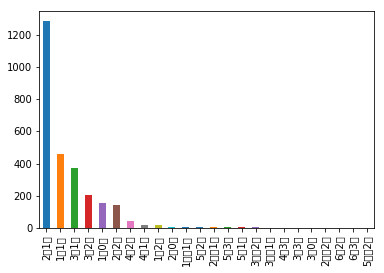

In [33]:
%matplotlib inline
lj_data['house_type'].value_counts().plot(kind='bar')

### 最受欢迎的房型

In [34]:
tmp_df = lj_data[['house_type', 'view_num']].groupby('house_type').agg('mean').reset_index()

In [35]:
tmp_df.nlargest(columns='view_num', n=1)

,house_type,view_num
23,6室3厅,21.0


### 房子的平均租房价格(按平米算)

In [36]:
lj_data.head(2)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,age,house_area
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37.0,50
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,13.0,79


In [37]:
lj_data.loc[:,'price_per_m2'] = lj_data['price']/lj_data['house_area']

In [38]:
lj_data['price_per_m2'].mean()

87.72268429900454

### 最受关注的小区

In [39]:
tmp_df = lj_data[['address', 'view_num']].groupby('address').agg(sum).reset_index()

In [40]:
tmp_df.nlargest(columns='view_num', n=1)

,address,view_num
951,清芷园,246


### 出租房源最多的小区

In [42]:
lj_data['address'].value_counts().head(1)

远洋山水    19
Name: address, dtype: int64

### 出租房源最多的地区(大家从详情页可以对标到 海淀/西城/东城/朝阳 不同城区...)

In [43]:
lj_data.head(2)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,age,house_area,price_per_m2
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37.0,50,116.000000
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,13.0,79,98.734177


### 集中供暖和非集中供暖的有多少家，平均价格是多少

In [44]:
lj_data.loc[:,'center_heating'] = lj_data['extra_info'].apply(lambda x:'集中供暖' in x)

In [45]:
lj_data['center_heating'].value_counts()

True     2284
False     476
Name: center_heating, dtype: int64

### 哪个城区的租房价格最贵，平均价格是多少

### 不同房型的平均/最大/最小面积

In [46]:
lj_data.columns

Index(['district', 'address', 'title', 'house_type', 'area', 'price', 'floor',
       'build_time', 'direction', 'update_time', 'view_num', 'extra_info',
       'link', 'age', 'house_area', 'price_per_m2', 'center_heating'],
      dtype='object')

In [47]:
lj_data[['house_type', 'house_area']].agg(['max','min','mean'])

,house_type,house_area
max,6室3厅,720.000000
min,1室0厅,19.000000
mean,NaN,87.658696


### 哪个地铁口附近的房子最多

In [49]:
lj_data.head(10)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,age,house_area,price_per_m2,center_heating
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37.0,50,116.000000,True
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,13.0,79,98.734177,True
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86平米,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,12.0,86,93.023256,False
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103平米,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,30,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html,14.0,103,51.456311,True
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63平米,6400,高楼层(共16层),1982年建塔楼,南,2017.07.26,30,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html,36.0,63,101.587302,True
5,回龙观租房,龙华园,龙泽龙华园57平低楼层一居室家具家电齐全拎包入住,1室1厅,58平米,4000,低楼层(共6层),1994年建板楼,南,2017.07.23,61,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101748994.html,24.0,58,68.965517,True
6,北苑租房,筑华年,筑华年西南小三居 靠谱出租 看房方便有钥匙,3室1厅,89平米,7500,高楼层(共24层),2012年建板楼,南,2017.07.25,29,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101767631.html,6.0,89,84.269663,True
7,马甸租房,月季园,10号牡丹园站月季园小区 拎包入住 离梦想更近一点,2室1厅,53平米,6000,低楼层(共21层),1997年建塔楼,南,2017.07.16,26,距离10号线牡丹园站580米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101763532.html,21.0,53,113.207547,True
8,小西天租房,今典花园,花园社区，西直门 今典花园精装两居，诚心出售。,2室1厅,73平米,8500,中楼层(共25层),2004年建塔楼,西,2017.07.23,44,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101758850.html,14.0,73,116.438356,True
9,北苑租房,北苑家园绣菊园,北苑东南两居室，可改三居 业主随时签约,2室1厅,82平米,5300,低楼层(共25层),2000年建塔楼,东南,2017.07.26,30,随时看房 集中供暖,https://bj.lianjia.com/zufang/101101779767.html,18.0,82,64.634146,True


In [66]:
import re
# 抽取信息
def  get_subway_info(string, pattern, n):
    result = re.search(pattern, string)
    if result:
        return result.group(n)
    return ''

In [67]:
my_pattern = '距离(\d+号线)(.*站)(\d+)米'       

In [68]:
# 地铁站
lj_data.loc[:,'subway_station'] = lj_data['extra_info'].\
    apply(lambda x:
              get_subway_info(x,\
                             pattern = my_pattern,
                             n=2))

In [69]:
# 地铁线
lj_data.loc[:,'subway_line'] = lj_data['extra_info'].\
    apply(lambda x:
              get_subway_info(x,\
                             pattern = my_pattern,
                             n=1))

In [70]:
# 距离地铁多远
lj_data.loc[:,'subway_distance'] = lj_data['extra_info'].\
    apply(lambda x:
              get_subway_info(x,\
                             pattern = my_pattern,
                             n=3))

In [71]:
lj_data.head(2)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,...,extra_info,link,age,house_area,price_per_m2,center_heating,subway_station,subway_line,subway_distance,near_subway
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,...,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37.0,50,116.000000,True,,,,True
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,...,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,13.0,79,98.734177,True,(东段)东湖渠站,14号线,731,True


In [72]:
lj_data['subway_station'].value_counts().head(2)

        1263
达官营站      43
Name: subway_station, dtype: int64

### 地铁附近的房子平均价格 比 非地铁的高多少

In [73]:
lj_data.loc[:,'near_subway'] = lj_data['subway_station'].apply(lambda x: x != '')

In [74]:
lj_data.head(10)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,...,extra_info,link,age,house_area,price_per_m2,center_heating,subway_station,subway_line,subway_distance,near_subway
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,...,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37.0,50,116.000000,True,,,,False
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,...,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,13.0,79,98.734177,True,(东段)东湖渠站,14号线,731,True
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86平米,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,...,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,12.0,86,93.023256,False,达官营站,7号线,684,True
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103平米,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,...,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html,14.0,103,51.456311,True,天通苑站,5号线,927,True
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63平米,6400,高楼层(共16层),1982年建塔楼,南,2017.07.26,...,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html,36.0,63,101.587302,True,团结湖站,10号线,88,True
5,回龙观租房,龙华园,龙泽龙华园57平低楼层一居室家具家电齐全拎包入住,1室1厅,58平米,4000,低楼层(共6层),1994年建板楼,南,2017.07.23,...,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101748994.html,24.0,58,68.965517,True,,,,False
6,北苑租房,筑华年,筑华年西南小三居 靠谱出租 看房方便有钥匙,3室1厅,89平米,7500,高楼层(共24层),2012年建板楼,南,2017.07.25,...,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101767631.html,6.0,89,84.269663,True,,,,False
7,马甸租房,月季园,10号牡丹园站月季园小区 拎包入住 离梦想更近一点,2室1厅,53平米,6000,低楼层(共21层),1997年建塔楼,南,2017.07.16,...,距离10号线牡丹园站580米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101763532.html,21.0,53,113.207547,True,牡丹园站,10号线,580,True
8,小西天租房,今典花园,花园社区，西直门 今典花园精装两居，诚心出售。,2室1厅,73平米,8500,中楼层(共25层),2004年建塔楼,西,2017.07.23,...,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101758850.html,14.0,73,116.438356,True,,,,False
9,北苑租房,北苑家园绣菊园,北苑东南两居室，可改三居 业主随时签约,2室1厅,82平米,5300,低楼层(共25层),2000年建塔楼,东南,2017.07.26,...,随时看房 集中供暖,https://bj.lianjia.com/zufang/101101779767.html,18.0,82,64.634146,True,,,,False


In [76]:
lj_data[['price_per_m2', 'near_subway']].groupby('near_subway').agg('mean')

,price_per_m2
near_subway,
False,68.057687
True,104.313794


### 地铁附近的房源离地铁平均距离

In [80]:
lj_data.loc[lj_data['near_subway']==True,'subway_distance'].astype(int).mean()

709.1182364729459

### 最多的在租楼层

In [82]:
lj_data.head(10)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,...,extra_info,link,age,house_area,price_per_m2,center_heating,subway_station,subway_line,subway_distance,near_subway
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,...,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,37.0,50,116.000000,True,,,,False
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,...,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,13.0,79,98.734177,True,(东段)东湖渠站,14号线,731,True
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86平米,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,...,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,12.0,86,93.023256,False,达官营站,7号线,684,True
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103平米,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,...,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html,14.0,103,51.456311,True,天通苑站,5号线,927,True
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63平米,6400,高楼层(共16层),1982年建塔楼,南,2017.07.26,...,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html,36.0,63,101.587302,True,团结湖站,10号线,88,True
5,回龙观租房,龙华园,龙泽龙华园57平低楼层一居室家具家电齐全拎包入住,1室1厅,58平米,4000,低楼层(共6层),1994年建板楼,南,2017.07.23,...,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101748994.html,24.0,58,68.965517,True,,,,False
6,北苑租房,筑华年,筑华年西南小三居 靠谱出租 看房方便有钥匙,3室1厅,89平米,7500,高楼层(共24层),2012年建板楼,南,2017.07.25,...,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101767631.html,6.0,89,84.269663,True,,,,False
7,马甸租房,月季园,10号牡丹园站月季园小区 拎包入住 离梦想更近一点,2室1厅,53平米,6000,低楼层(共21层),1997年建塔楼,南,2017.07.16,...,距离10号线牡丹园站580米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101763532.html,21.0,53,113.207547,True,牡丹园站,10号线,580,True
8,小西天租房,今典花园,花园社区，西直门 今典花园精装两居，诚心出售。,2室1厅,73平米,8500,中楼层(共25层),2004年建塔楼,西,2017.07.23,...,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101758850.html,14.0,73,116.438356,True,,,,False
9,北苑租房,北苑家园绣菊园,北苑东南两居室，可改三居 业主随时签约,2室1厅,82平米,5300,低楼层(共25层),2000年建塔楼,东南,2017.07.26,...,随时看房 集中供暖,https://bj.lianjia.com/zufang/101101779767.html,18.0,82,64.634146,True,,,,False


In [84]:
def get_floor(x):
    try:
        return x[0]
    except:
        return np.NaN

In [85]:
lj_data.loc[:,'house_floor'] = lj_data['floor'].apply(get_floor)

In [87]:
lj_data['house_floor'].value_counts()

中    1026
高     932
低     798
地       4
Name: house_floor, dtype: int64

### 不同地区的房龄分布

In [88]:
lj_data.groupby('house_floor').describe()

age                                                     \
              count       mean       std  min   25%   50%    75%   max   
house_floor                                                              
中            1024.0  17.591797  8.967486  2.0  11.0  15.0  22.00  62.0   
低             796.0  16.375628  7.903720  3.0  11.0  14.0  20.00  62.0   
地               4.0  13.250000  3.095696  9.0  12.0  14.0  15.25  16.0   
高             931.0  18.845328  9.303585  3.0  12.0  17.0  24.00  58.0   

            house_area              ...   price_per_m2             view_num  \
                 count        mean  ...            75%         max    count   
house_floor                         ...                                       
中               1026.0   87.196881  ...     110.160158  276.315789   1026.0   
低                798.0   90.751880  ...     109.375000  291.666667    798.0   
地                  4.0  127.500000  ...     102.470294  102.564103      4.0   
高                932.0   85.347639  ...     108.639430  271.739130    932.0   

                                                                
                  mean        std  min  25%   50%   75%    max  
house_floor                                                     
中            14.214425  12.932275  0.0  5.0  11.0  20.0  102.0  
低            14.630326  13.891584  0.0  5.0  11.0  20.0  122.0  
地             8.000000   6.976150  1.0  2.5   8.5  14.0   14.0  
高            11.618026  11.253930  0.0  3.0   8.0  17.0   72.0  

[4 rows x 40 columns]

### 直接看房的房子比例

In [91]:
lj_data.loc[:,'convenient'] = lj_data['extra_info'].apply(lambda x:'随时看房' in x)

In [93]:
lj_data['convenient'].value_counts(normalize=True)

True     0.998551
False    0.001449
Name: convenient, dtype: float64

### 有电梯和无电梯的房子数量

### 有电梯和无电梯房子情况(面积/价格/朝向/带看人数)分布

### 附加信息里主要有哪几类信息，覆盖多少百分比的房子

In [ ]:
# 分割附加信息，怎么合理分列（识别信息类别），然后就可以看覆盖百分比了。